In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Dropout

from pylab import rcParams

<Axes: >

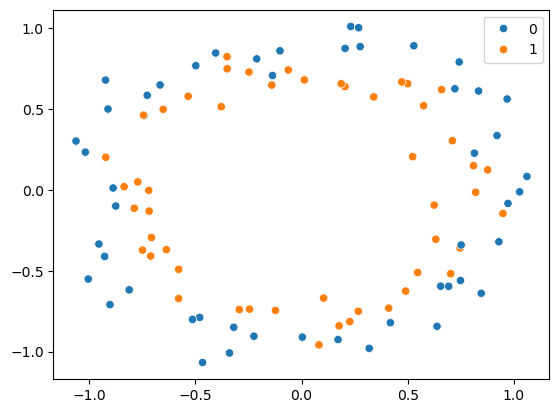

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
sns.scatterplot(x = X[:,0], y = X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


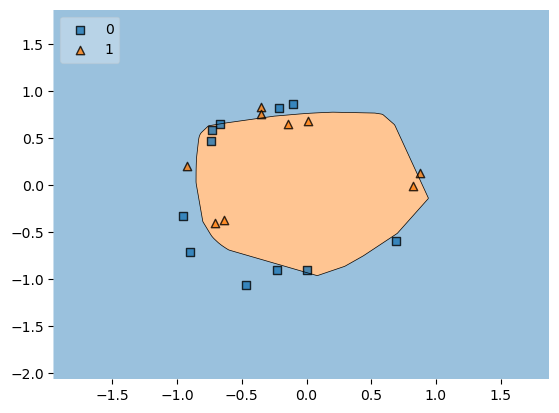

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

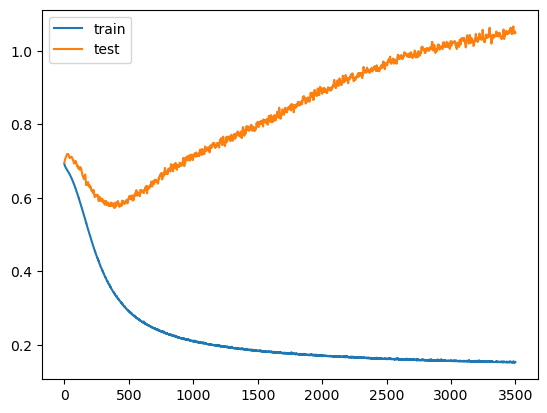

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<h1>Early Stopping</h1>

In [11]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.000001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.5844 - loss: 0.6720 - val_accuracy: 0.4000 - val_loss: 0.7176
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5781 - loss: 0.6713 - val_accuracy: 0.4000 - val_loss: 0.7185
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5648 - loss: 0.6813 - val_accuracy: 0.4000 - val_loss: 0.7192
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6039 - loss: 0.6641 - val_accuracy: 0.4000 - val_loss: 0.7198
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5844 - loss: 0.6660 - val_accuracy: 0.4000 - val_loss: 0.7200
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5570 - loss: 0.6746 - val_accuracy: 0.4000 - val_loss: 0.7198
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5688 - loss: 0.6699 - val_accuracy: 0.4000 - val_loss: 0.7198
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5844 - loss: 0.6662 - val_accuracy: 0.4000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


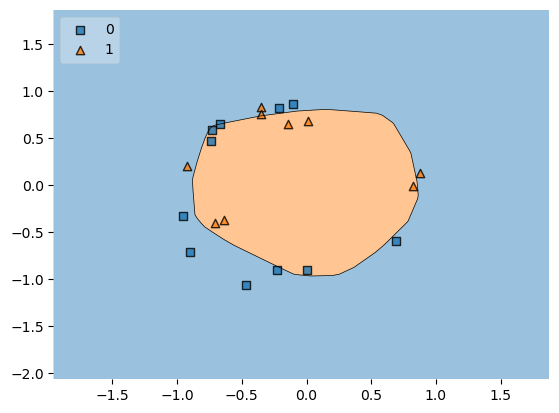

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

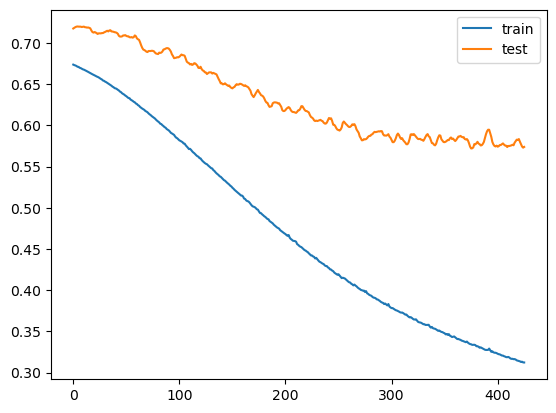

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()